<img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/Logo_Universidad_Politécnica_Salesiana_del_Ecuador.png" width="90%">
<h2>Práctica 3:
    Redes neuronales</h2>
<h3>Integrantes: Michelle Parraga, Andrés Alba </h3>

<h2>3.Diseñar un Modelo de Redes Neuronales (para el dataset HEPATITIS) con los siguientes pasos:
Dataset: https://archive.ics.uci.edu/ml/datasets/Hepatitis

<h3>3.1 Preparación de datos 

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import seaborn as sns
import copy

print("Módulos y clases importados")

Módulos y clases importados


| Cantidad de variables | Cantidad de observaciones | Variable de salida |
|:-----------:|:-----------:|:-----------:|
| <center>19</center>   | <center>155</center> |<center><b>Class: Vivo/Muerto</b></center>  |




| Id | Variable | Descripción breve | Tipo | Técnica a aplicar | Función en Python  |
|-----------|-----------|-----------|-----------|-----------|-----------|
| 1 | EDAD | Años de edad | Numérica discreta| Estandarización| StandardScaler|
| 2 | SEXO| Masculino o Femenino | Categórica nominal | Sistema binario| OneHotEncoder|
| 3 | ESTEROIDES | Si usa o no | Categórica nominal | Sistema binario| OneHotEncoder |
| 4 | ANTIVIRALES | Si usa o no | Categórica nominal|Sistema binario| OneHotEncoder|
| 5 | FATIGA | Si tiene o no| Categórica nominal | Sistema binario| OneHotEncoder|
|6 | MALESTAR | Si tiene o no | Categórica nominal | Sistema binario|OneHotEncoder|
| 7 | ANOREXIA | Si tiene o no | Categórica nominal | Sistema binario|OneHotEncoder|
| 8| HÍGADO GRANDE | Si tiene o no | Categórica nominal| Sistema binario|OneHotEncoder|
| 9 | HÍGADO FIRME | Si tiene o no | Categórica nominal | Sistema binario|OneHotEncoder|
| 10 | ESPÍLEO PALPABLE | Si tiene o no | Categórica nominal |Sistema binario|OneHotEncoder|
| 11| ARAÑAS | Si tiene o no| Categórica nominal |Sistema binario|OneHotEncoder|
| 12 |  ASCITIS | Si tiene o no | Categórica nominal |Sistema binario|OneHotEncoder|
| 13 | VARICES |Si tiene o no | Categórica nominal |Sistema binario|OneHotEncoder|
| 14 | BILIRRUBINA | niveles de bilirrubina en la sangre,</br> siendo un valor continuo. | Numérica Contínua | Estandarización| StandardScaler|
| 15 |  ALK FOSFATO | niveles de fosfato Alcalino en la sangre.</br>  | Numérica discreta | Estandarización| StandardScaler|
| 16 |SGOT | cantidad de la enzima SGOT en la sangre.  | Numérica discreta |Estandarización| StandardScaler|
| 17 | ALBÚMINA |cantidad de la Albumina en la sangre,</br> siendo un valor continuo. | Numérica Contínua  | Estandarización| StandardScaler|
| 18 | PROTIMA | El tiempo de protrombina es una </br> prueba para evaluar la</br> coagulación de la sangre. | Numérica discreta | Estandarización| StandardScaler|
| 19 | HISTOLOGÍA | Si es histolog@ o no | Categórica nominal| Sistema binario| OneHotEncoder|


<h5>c. Cargar el dataset</h5>

In [3]:
import pandas as pd  
import copy
print("Importaciones hechas")

Importaciones hechas


In [4]:
nombresVariables=['Class','EDAD','SEXO','ESTEROIDES','ANTIVIRALES','FATIGA','MALESTAR','ANOREXIA',' HÍGADO GRANDE','HÍGADO FIRME',
                  'ESPÍLEO PALPABLE','ARAÑAS','ASCITIS','VARICES','BILIRRUBINA','ALK FOSFATO','SGOT','ALBÚMINA',
                  'PROTIMA','HISTOLOGÍA']
dataset = "https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"
dfOriginal = pd.read_csv(dataset, sep = ',', names=nombresVariables)
dataframe=copy.deepcopy(dfOriginal)
print(dataframe.shape)
print('dataset cargado')
dataframe.head(10)



(155, 20)
dataset cargado


,Class,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALESTAR,ANOREXIA,HÍGADO GRANDE,HÍGADO FIRME,ESPÍLEO PALPABLE,ARAÑAS,ASCITIS,VARICES,BILIRRUBINA,ALK FOSFATO,SGOT,ALBÚMINA,PROTIMA,HISTOLOGÍA
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,?,?,?,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,?,48,4.4,?,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,120,3.9,?,1


<h5>d. Realizar preparación de datos con un Pipeline (transformación de variables categóricas a numéricas y transformaciones numéricas). Presentar y guardar el dataset transformado. </h5>

In [5]:
### REEMPLAZO DE ? POR 0 ##
New_DF = dfOriginal.replace('?', '0')

## Separamos nuestra variable de Salida ##
Y=New_DF['Class']

## Eliminamos las variables que no necesitamos ##
New_DF=New_DF.drop(['HISTOLOGÍA'], axis=1)
New_DF=New_DF.drop(['Class'], axis=1)

print(New_DF.shape)
New_DF.head(10)

(155, 18)


,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALESTAR,ANOREXIA,HÍGADO GRANDE,HÍGADO FIRME,ESPÍLEO PALPABLE,ARAÑAS,ASCITIS,VARICES,BILIRRUBINA,ALK FOSFATO,SGOT,ALBÚMINA,PROTIMA
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0
3,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0
5,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75
6,51,1,1,2,1,2,1,2,2,1,1,2,2,0,0,0,0,0
7,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,0,0,0
8,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,0,48,4.4,0
9,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,120,3.9,0


<h6>Función para un resumen de nuestras variables antes de hacer el pipeline</h6>

In [6]:

def descripcionCantidadVariables(dataframePreprocesado, categorical_ordinal_features, categorical_nominal_features,numeric_features):
    cantidadTotalVariables = len(dataframePreprocesado.columns) 
    print('Cantidad de variables antes de procesamiento: ',cantidadTotalVariables)

    cantidadVariablesNominales = len(categorical_nominal_features)
    cantidadVariablesBinarias=0
    for variable in categorical_nominal_features:
        cantidadVariablesBinarias=cantidadVariablesBinarias+dataframePreprocesado[variable].nunique()
    print('Cantidad de variables binarias: ',cantidadVariablesBinarias)
    
    cantidadTotalVariablesConPreprocesado = cantidadTotalVariables - cantidadVariablesNominales + cantidadVariablesBinarias
    print ('Cantidad de variables númericas: ', len(numeric_features))
    print('Cantidad de variables que habrá después de preprocesamiento: ',cantidadTotalVariablesConPreprocesado)
    print('Cantidad de variables de salida: ',len(salida))
    return cantidadTotalVariablesConPreprocesado

Separación de nuestras variables

In [7]:
DFPreproces=copy.deepcopy(New_DF)

categorical_ordinal_features = []
categorical_nominal_features = ['SEXO','ESTEROIDES','ANTIVIRALES','FATIGA','MALESTAR','ANOREXIA',' HÍGADO GRANDE','HÍGADO FIRME',
                  'ESPÍLEO PALPABLE','ARAÑAS','ASCITIS','VARICES'] 
numeric_features = ['EDAD','BILIRRUBINA','ALK FOSFATO','SGOT','ALBÚMINA','PROTIMA']
salida = ['Class']
TotVariablePreProces= descripcionCantidadVariables(DFPreproces, categorical_ordinal_features, categorical_nominal_features,numeric_features)               

Cantidad de variables antes de procesamiento:  18
Cantidad de variables binarias:  34
Cantidad de variables númericas:  6
Cantidad de variables que habrá después de preprocesamiento:  40
Cantidad de variables de salida:  1


<h6>Definición de preprocesadores</h6>

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
print ('Librerias importadas')

Librerias importadas


In [9]:
#1. Preprocesador de variables categóricas a numéricas (ordinales y nominales)

categorical_ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())])

categorical_nominal_transformer_ConNombres = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse = False))])

preprocesorCategoricoNumericoConNombres = ColumnTransformer(
    transformers=[
        ('catord', categorical_ordinal_transformer, categorical_ordinal_features),
        ('catnom', categorical_nominal_transformer_ConNombres, categorical_nominal_features)
    ],remainder='passthrough',n_jobs=-1)

#2. Preprocesador de variables numéricas con transformación MinMaxScaler

minmax_transformer = Pipeline(steps=[
    ('minmax', MinMaxScaler(feature_range=(0, 1)))])

preprocesorMinMax = ColumnTransformer(transformers =[
    ('tranminmax', minmax_transformer, list(range(TotVariablePreProces)))
], remainder ='passthrough')

#3. Preprocesador de variables numéricas con transformación StandardScaler

standardscaler_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=True,with_std=True))])

preprocesorStandardScaler = ColumnTransformer(transformers =[
    ('transcaler', standardscaler_transformer, list(range(TotVariablePreProces)))
], remainder ='passthrough')

#4. Preprocesador de variables numéricas con transformación SimpleImputer

simpleimputer_transformer = Pipeline(steps=[
    ('simpleimputer', SimpleImputer(strategy='median')) #otras: strategy='constant', strategy='most_frequent'
])

preprocesorSimpleImputer = ColumnTransformer(transformers =[
    ('transimpleimputer', simpleimputer_transformer, list(range(TotVariablePreProces)))
], remainder ='passthrough')

print("Preprocesadores y transformadores definidos")

Preprocesadores y transformadores definidos


<h6> Construcción de Pipelines, selección de preprocesadores y aplicación de un Pipeline </h6>

In [10]:
pipe = Pipeline(steps=[
    ('prepcn', preprocesorCategoricoNumericoConNombres), 
    ('prepminmax', preprocesorMinMax) 
    #('prepstandard', preprocesorStandardScaler) 
    #('prepsimple', preprocesorSimpleImputer)
])

X_Preprocesado = pipe.fit_transform(DFPreproces)
print('Pipeline aplicado')

Pipeline aplicado


In [11]:
X_Preprocesado.shape

(155, 40)

In [12]:
X_Preprocesado

array([[0.        , 1.        , 0.        , ..., 0.02777778, 0.625     ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.06481481, 0.546875  ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.04938272, 0.625     ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.0308642 , 0.640625  ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02932099, 0.640625  ,
        0.48      ],
       [1.        , 0.        , 0.        , ..., 0.02932099, 0.484375  ,
        0.42      ]])

<h6>Guardar y cargar Pipeline</h6>

In [13]:
##Importar las librerias necesarias
import pickle
print ('Librerias pickle importada correctamente')
# Funciones para guardar y cargar un Pipeline

def guardarPipeline(pipeline,nombreArchivo):
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)

def cargarPipeline(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
    return pipeline

Librerias pickle importada correctamente


In [14]:
## Guardado del Pipeline
guardarPipeline(pipe,'pipePreprocesadores')

pipe=None
pipe=cargarPipeline('pipePreprocesadores')
print(pipe)

Pipeline(steps=[('prepcn',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('catord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  []),
                                                 ('catnom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['SEXO', 'ESTEROIDES',
                                                   'ANTIVIRALES', 'FATIGA',
                                                   'MALESTAR', 'ANOREXIA',
                                                   ' HÍGADO GRANDE',
                                                   'HÍGADO FIRME',
                         

<h6>Guardar dataframe preprocesado</h6>

In [15]:
pipe.named_steps['prepcn'].transformers_[1]

('catnom',
 Pipeline(steps=[('onehot', OneHotEncoder(sparse=False, sparse_output=False))]),
 ['SEXO',
  'ESTEROIDES',
  'ANTIVIRALES',
  'FATIGA',
  'MALESTAR',
  'ANOREXIA',
  ' HÍGADO GRANDE',
  'HÍGADO FIRME',
  'ESPÍLEO PALPABLE',
  'ARAÑAS',
  'ASCITIS',
  'VARICES'])

In [16]:
print('Cantidad de variables después de preprocesamiento: ',TotVariablePreProces)
print('Cantidad de variables de salida: ',1)

categorical_ordinal_features = []
categorical_nominal_features = ['SEXO','ESTEROIDES','ANTIVIRALES','FATIGA','MALESTAR','ANOREXIA',' HÍGADO GRANDE','HÍGADO FIRME',
                  'ESPÍLEO PALPABLE','ARAÑAS','ASCITIS','VARICES'] 
numeric_features = ['EDAD','BILIRRUBINA','ALK FOSFATO','SGOT','ALBÚMINA','PROTIMA']

cnamesDataset1=[]
cnamesDataset1.extend(categorical_ordinal_features)

cnamesDataset2 = pipe.named_steps['prepcn'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names_out(categorical_nominal_features)

cnamesDataset3 = numeric_features

cnamesDataset1.extend(cnamesDataset2)
cnamesDataset1.extend(cnamesDataset3)
print(cnamesDataset1)


DFPreproces = pd.DataFrame(data=X_Preprocesado,columns=cnamesDataset1)
DFPreproces.head()
DFPreproces = pd.concat([DFPreproces, dfOriginal[salida]], axis = 1)
DFPreproces.to_csv("DatasetHepatitisPreprocesado.csv", sep=";",index = False)
DFPreproces.head()

Cantidad de variables después de preprocesamiento:  40
Cantidad de variables de salida:  1
['SEXO_1', 'SEXO_2', 'ESTEROIDES_0', 'ESTEROIDES_1', 'ESTEROIDES_2', 'ANTIVIRALES_1', 'ANTIVIRALES_2', 'FATIGA_0', 'FATIGA_1', 'FATIGA_2', 'MALESTAR_0', 'MALESTAR_1', 'MALESTAR_2', 'ANOREXIA_0', 'ANOREXIA_1', 'ANOREXIA_2', ' HÍGADO GRANDE_0', ' HÍGADO GRANDE_1', ' HÍGADO GRANDE_2', 'HÍGADO FIRME_0', 'HÍGADO FIRME_1', 'HÍGADO FIRME_2', 'ESPÍLEO PALPABLE_0', 'ESPÍLEO PALPABLE_1', 'ESPÍLEO PALPABLE_2', 'ARAÑAS_0', 'ARAÑAS_1', 'ARAÑAS_2', 'ASCITIS_0', 'ASCITIS_1', 'ASCITIS_2', 'VARICES_0', 'VARICES_1', 'VARICES_2', 'EDAD', 'BILIRRUBINA', 'ALK FOSFATO', 'SGOT', 'ALBÚMINA', 'PROTIMA']


,SEXO_1,SEXO_2,ESTEROIDES_0,ESTEROIDES_1,ESTEROIDES_2,ANTIVIRALES_1,ANTIVIRALES_2,FATIGA_0,FATIGA_1,FATIGA_2,...,VARICES_0,VARICES_1,VARICES_2,EDAD,BILIRRUBINA,ALK FOSFATO,SGOT,ALBÚMINA,PROTIMA,Class
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.323944,0.1250,0.288136,0.027778,0.625000,0.0,2
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.605634,0.1125,0.457627,0.064815,0.546875,0.0,2
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.000000,0.0875,0.325424,0.049383,0.625000,0.0,2
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.338028,0.0875,0.155932,0.080247,0.625000,0.8,2
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.380282,0.1250,0.000000,0.308642,0.625000,0.0,2


<h3>3. Estadística descriptiva </h3>

<h5>a. calcular las medidas descriptivas y generar conclusiones de la media y la desviación estándar de una variable que considere interesante </h5>

In [17]:
DFPreproces.describe() 

,SEXO_1,SEXO_2,ESTEROIDES_0,ESTEROIDES_1,ESTEROIDES_2,ANTIVIRALES_1,ANTIVIRALES_2,FATIGA_0,FATIGA_1,FATIGA_2,...,VARICES_0,VARICES_1,VARICES_2,EDAD,BILIRRUBINA,ALK FOSFATO,SGOT,ALBÚMINA,PROTIMA,Class
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,...,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.896774,0.103226,0.006452,0.490323,0.503226,0.154839,0.845161,0.006452,0.645161,0.348387,...,0.032258,0.116129,0.851613,0.481690,0.171532,0.290235,0.129132,0.534879,0.351161,1.793548
std,0.305240,0.305240,0.080322,0.501527,0.501610,0.362923,0.362923,0.080322,0.480015,0.478004,...,0.177257,0.321418,0.356636,0.176984,0.152499,0.210379,0.138160,0.205991,0.352219,0.406070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.352113,0.087500,0.172881,0.047068,0.476562,0.000000,2.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.450704,0.125000,0.284746,0.084877,0.609375,0.350000,2.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.605634,0.187500,0.405085,0.152778,0.656250,0.650000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


<h5>b. Calcular las correlaciones entre todas las variables</h5>

In [18]:
cr=DFPreproces.corr()
cr.head(41)

,SEXO_1,SEXO_2,ESTEROIDES_0,ESTEROIDES_1,ESTEROIDES_2,ANTIVIRALES_1,ANTIVIRALES_2,FATIGA_0,FATIGA_1,FATIGA_2,...,VARICES_0,VARICES_1,VARICES_2,EDAD,BILIRRUBINA,ALK FOSFATO,SGOT,ALBÚMINA,PROTIMA,Class
SEXO_1,1.000000,-1.000000,0.027340,-0.048985,0.044599,-0.089249,0.089249,0.027340,-0.074340,0.070059,...,-0.058072,0.056792,-0.022321,-0.008126,0.039341,-0.162851,0.008991,0.018906,-0.067128,-0.173051
SEXO_2,-1.000000,1.000000,-0.027340,0.048985,-0.044599,0.089249,-0.089249,-0.027340,0.074340,-0.070059,...,0.058072,-0.056792,0.022321,0.008126,-0.039341,0.162851,-0.008991,-0.018906,0.067128,0.173051
ESTEROIDES_0,0.027340,-0.027340,1.000000,-0.079037,-0.081104,0.188265,-0.188265,-0.006494,-0.108657,0.110206,...,-0.014712,-0.029209,0.033637,-0.065622,-0.044548,-0.051609,-0.028605,0.035369,0.103020,0.041102
ESTEROIDES_1,-0.048985,0.048985,-0.079037,1.000000,-0.987177,0.043961,-0.043961,0.082157,0.160968,-0.175451,...,0.040056,-0.073548,0.046376,0.090466,0.020253,0.059860,0.030734,-0.219649,-0.066839,-0.137413
ESTEROIDES_2,0.044599,-0.044599,-0.081104,-0.987177,1.000000,-0.074101,0.074101,-0.081104,-0.143542,0.157775,...,-0.037694,0.078213,-0.051755,-0.079943,-0.013117,-0.051586,-0.026149,0.213949,0.050331,0.130809
ANTIVIRALES_1,-0.089249,0.089249,0.188265,0.043961,-0.074101,1.000000,-1.000000,-0.034491,-0.055310,0.061339,...,-0.078146,-0.155148,0.178668,0.013100,-0.177958,-0.041764,-0.095980,0.153939,0.276452,0.130196
ANTIVIRALES_2,0.089249,-0.089249,-0.188265,-0.043961,0.074101,-1.000000,1.000000,0.034491,0.055310,-0.061339,...,0.078146,0.155148,-0.178668,-0.013100,0.177958,0.041764,0.095980,-0.153939,-0.276452,-0.130196
FATIGA_0,0.027340,-0.027340,-0.006494,0.082157,-0.081104,-0.034491,0.034491,1.000000,-0.108657,-0.058922,...,0.441367,-0.029209,-0.193047,-0.046322,-0.090933,-0.111530,-0.075561,-0.209919,-0.080601,0.041102
FATIGA_1,-0.074340,0.074340,-0.108657,0.160968,-0.143542,-0.055310,0.055310,-0.108657,1.000000,-0.985950,...,-0.017233,0.184642,-0.157844,0.285284,0.279140,0.149979,0.204176,-0.132600,-0.048244,-0.311644
FATIGA_2,0.070059,-0.070059,0.110206,-0.175451,0.157775,0.061339,-0.061339,-0.058922,-0.985950,1.000000,...,-0.056860,-0.180511,0.190947,-0.278701,-0.265035,-0.131869,-0.192338,0.168432,0.061991,0.306049


<h5>c. Realizar un mapa de calor con los valores de las correlaciones  </h5>

Libreria numpy,seaborn y matplotlib importadas correctamente


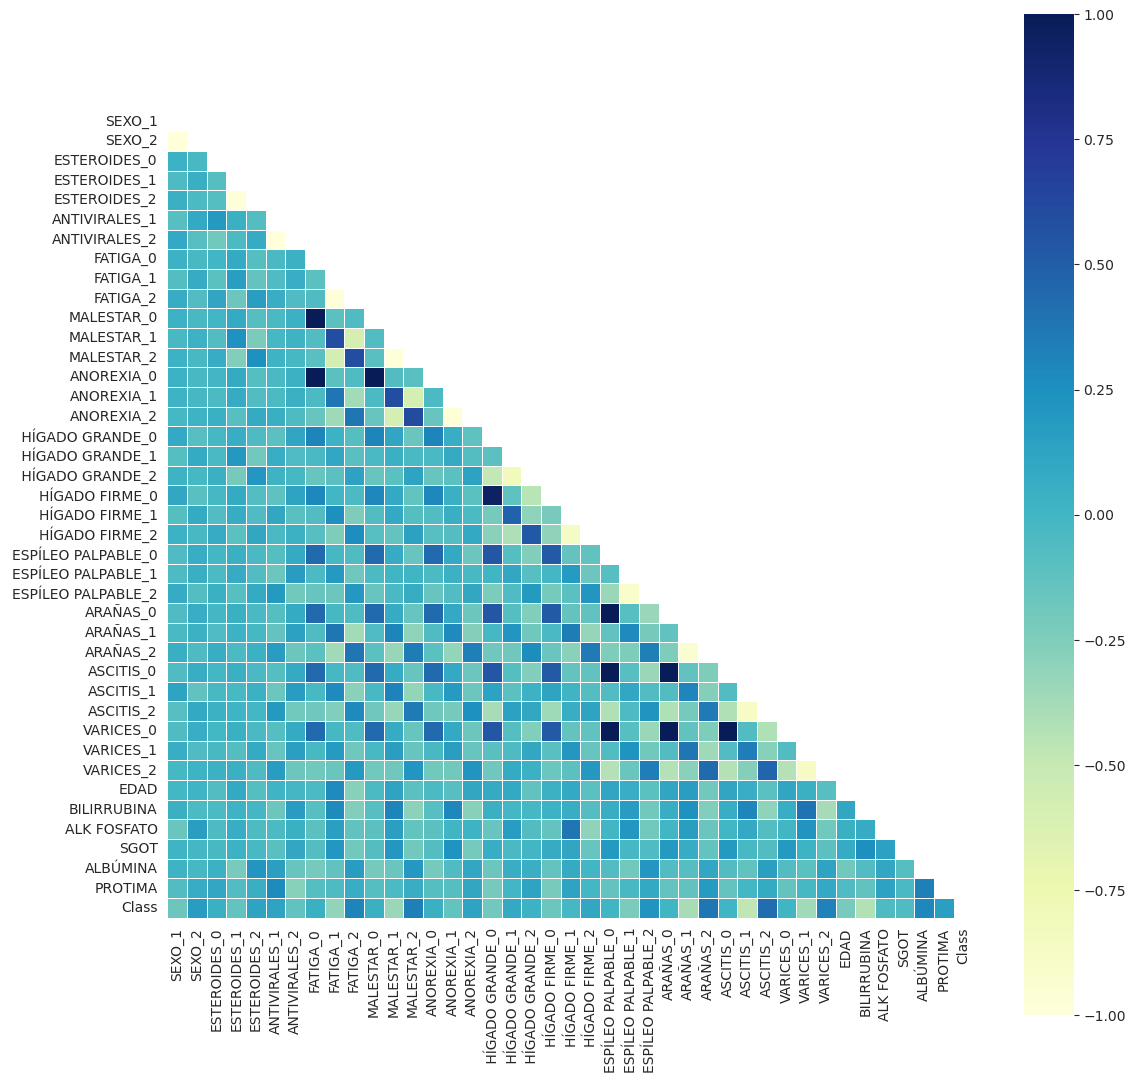

In [19]:
## Importar librerias 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt 
print('Libreria numpy,seaborn y matplotlib importadas correctamente')

mask = np.zeros_like(cr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 13))
    ax = sns.heatmap(cr, mask=mask, square=True, linewidths=.5, cmap="YlGnBu")
plt.savefig('attribute_correlations.png')

<h3>3.2 Desarrollo y entrenamiento de una Red Neuronal (arquitectura de 4 capas - L1:256, L2:128, L3:64, L4:1). Guardar 
el modelo en un archivo h5

In [20]:
#Modelo secuencial quiere decir que agregaremos capas y se conectarán de manera secuencial.
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.models import model_from_json
#json:  {l1:'8',l2:'1'}
from sklearn.model_selection import train_test_split
from keras.models import load_model
print('Librerías importadas')

ModuleNotFoundError: No module named 'keras'

<h3>5. Conclusiones  </h3>